# Project Trials


## speech recognition and analysis using NLP

### Installing &Importing speech_recognition package 

In [1]:
pip install SpeechRecognition pyaudio

Note: you may need to restart the kernel to use updated packages.


In [94]:
import speech_recognition as sr
import csv
import time
import matplotlib.pyplot as plt
import numpy as np
import random

In [5]:
def record_and_transcribe():
    # Initialize the recognizer
    recognizer = sr.Recognizer()

    # Record audio using the default microphone
    with sr.Microphone() as source:
        print("Please speak something...")
        audio = recognizer.listen(source, timeout=5)

    try:
        # Recognize speech using Google Web Speech API
        text = recognizer.recognize_google(audio)
        print("You said: " + text)
        return text
    except sr.UnknownValueError:
        print("Sorry, could not understand audio.")
    except sr.RequestError as e:
        print("Could not request results from Google Web Speech API; {0}".format(e))

if __name__ == "__main__":
    text_result = record_and_transcribe()
    if text_result:
        with open("transcription.csv", "w") as file:
            file.write(text_result)
            print("Transcription saved to transcription.csv")

Please speak something...
You said: hi bro how are you
Transcription saved to transcription.csv


In [21]:
#file path in local storage
import os 
os.getcwd()

'C:\\Users\\Dell\\Desktop\\Untitled Folder'

## Reading the Recorded Data

In [11]:
import pandas as pd 
df=pd.read_csv("transcription.csv")
df

,hi bro how are you


## Updating Recorded data into final CSV file for Analysis

In [14]:
df.to_csv("final.csv",mode='a')

In [33]:
import pandas as pd
df=pd.read_csv("final.csv",header=None)[1]
df

0    hello my name is Nitin hello my name is Nitin ...
1    hello my name is Nitin hello my name is Nitin ...
2            hello my dear Nikhil Nikhil Nikhil Nikhil
3                                   hi bro how are you
4                                   hi bro how are you
5                                   hi bro how are you
6                                   hi bro how are you
Name: 1, dtype: object

## Analysing Recorded Data:

###  - 1) .Define commonly used words

In [88]:
common_list=['Nitin','bro','Nikhil','my']

###  - 2). Count the required words 

In [42]:
d={}
for i in df:
    lst=i.split()
    for char in lst:
        if char in common_list:
            if char not in d:
                d[char]=1
            else:
                d[char]+=1
print(d)

{'my': 5, 'Nitin': 4, 'Nikhil': 4, 'bro': 4}


In [89]:
var=list(d.keys())
val=list(d.values())

In [92]:
val

[5, 4, 4, 4]

In [93]:
var

['my', 'Nitin', 'Nikhil', 'bro']

### - 3) . Visualizing the counts for further analysis

In [83]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

In [86]:
color_names = [
    'red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow',
    'brown', 'pink', 'violet', 'indigo', 'lime', 'teal', 'olive', 'maroon',
    'navy', 'aqua', 'fuchsia', 'silver', 'gray', 'black', 'white',
    # Add more color names as needed
]
colors=random.sample(color_names,len(var))

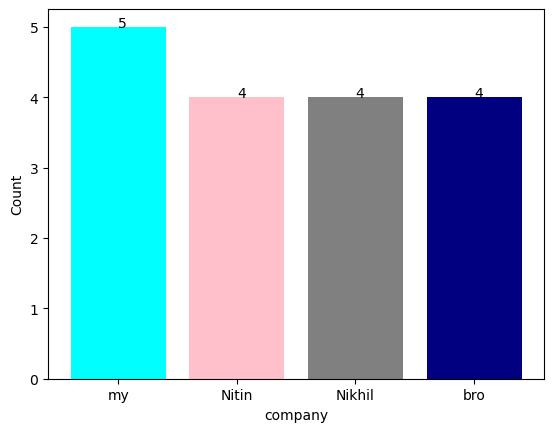

In [87]:
plt.bar(var,val,color=colors)
addlabels(var,val)
plt.xlabel('company')
plt.ylabel('Count')
plt.show()